<a href="https://colab.research.google.com/github/GrahamLoughrey86/Jun-13-2024/blob/main/time_series_forecasting_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install the required libraries
!pip install prophet

In [ ]:
# Import the required libraries and dependencies
import pandas as pd
import datetime as dt
from prophet import Prophet

%matplotlib inline

In [3]:
# Import the `files` library to allow files upload
from google.colab import files

In [5]:
# Upload "hourly_grid_prices.csv" into Colab,
uploaded = files.upload()

Saving hourly_grid_prices.csv to hourly_grid_prices.csv


In [7]:
# Read in the CSV file to a DataFrame
chicago_df = pd.read_csv("hourly_grid_prices.csv", index_col='day-hour', parse_dates=True).dropna()
chicago_df.head()
# Display the first and last five rows of the DataFrame
display(chicago_df.head())

<ipython-input-7-53dd099a9ef5>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  chicago_df = pd.read_csv("hourly_grid_prices.csv", index_col='day-hour', parse_dates=True).dropna()


,Price
day-hour,
2015-10-31 01:00:00,18.15
2015-10-31 02:00:00,20.73
2015-10-31 03:00:00,19.49
2015-10-31 04:00:00,17.75
2015-10-31 05:00:00,17.38


<Axes: xlabel='day-hour'>

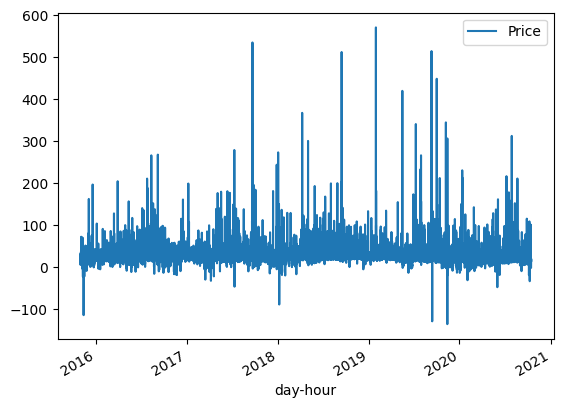

In [8]:
# Plot the DataFrame
chicago_df.plot()

In [9]:
# Reset the index of the DataFrame
prophet_df =chicago_df.reset_index()

# Review the first and last five rows of the DataFrame
display(prophet_df).head()


,day-hour,Price
0,2015-10-31 01:00:00,18.15
1,2015-10-31 02:00:00,20.73
2,2015-10-31 03:00:00,19.49
3,2015-10-31 04:00:00,17.75
4,2015-10-31 05:00:00,17.38
...,...,...
43363,2020-10-14 20:00:00,19.23
43364,2020-10-14 21:00:00,13.45
43365,2020-10-14 22:00:00,15.24
43366,2020-10-14 23:00:00,17.00


AttributeError: 'NoneType' object has no attribute 'head'

In [10]:
# Prepare the training data to be read into a prophet model
# Rename the columns to names that Prophet recognizes
prophet_df.columns = ['ds' , 'y']
prophet_df.head()

,ds,y
0,2015-10-31 01:00:00,18.15
1,2015-10-31 02:00:00,20.73
2,2015-10-31 03:00:00,19.49
3,2015-10-31 04:00:00,17.75
4,2015-10-31 05:00:00,17.38


In [11]:
# Confirm that there are no NaN values
prophet_df = prophet_df.dropna()
prophet_df.head()

,ds,y
0,2015-10-31 01:00:00,18.15
1,2015-10-31 02:00:00,20.73
2,2015-10-31 03:00:00,19.49
3,2015-10-31 04:00:00,17.75
4,2015-10-31 05:00:00,17.38


In [12]:
# Call the Prophet function and store as an object
model = Prophet()
model

In [13]:
# Fit the time series Prophet model
model.fit(prophet_df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpmokigldi/gg777r8a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmokigldi/2qjfk2uf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32317', 'data', 'file=/tmp/tmpmokigldi/gg777r8a.json', 'init=/tmp/tmpmokigldi/2qjfk2uf.json', 'output', 'file=/tmp/tmpmokigldi/prophet_model2gyor3rf/prophet_model-20240708224909.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:49:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:49:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [14]:
# Create a future DataFrame to hold predictions
# Make the prediction go out as far as 720 hours (30 days)
future = model.make_future_dataframe(periods=720, freq='H')

# Review the first and last 10 rows of the DataFrame
display(future.head(10))
display(future.tail(10))

,ds
0,2015-10-31 01:00:00
1,2015-10-31 02:00:00
2,2015-10-31 03:00:00
3,2015-10-31 04:00:00
4,2015-10-31 05:00:00
5,2015-10-31 06:00:00
6,2015-10-31 07:00:00
7,2015-10-31 08:00:00
8,2015-10-31 09:00:00
9,2015-10-31 10:00:00


,ds
44078,2020-11-13 15:00:00
44079,2020-11-13 16:00:00
44080,2020-11-13 17:00:00
44081,2020-11-13 18:00:00
44082,2020-11-13 19:00:00
44083,2020-11-13 20:00:00
44084,2020-11-13 21:00:00
44085,2020-11-13 22:00:00
44086,2020-11-13 23:00:00
44087,2020-11-14 00:00:00


In [15]:
# Make a forecast based on the future DataFrame
forecast = model.predict(future)

# Review the first five rows of the forecast DataFrame
display(forecast.head(10))
display(forecast.tail(10))

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-10-31 01:00:00,22.301733,-3.315970,35.485467,22.301733,22.301733,-5.686153,-5.686153,-5.686153,-5.793866,...,-0.380278,-0.380278,-0.380278,0.487990,0.487990,0.487990,0.0,0.0,0.0,16.615580
1,2015-10-31 02:00:00,22.302412,-2.119266,33.448050,22.302412,22.302412,-6.753865,-6.753865,-6.753865,-6.785939,...,-0.458156,-0.458156,-0.458156,0.490230,0.490230,0.490230,0.0,0.0,0.0,15.548547
2,2015-10-31 03:00:00,22.303091,-3.401353,32.808862,22.303091,22.303091,-7.607759,-7.607759,-7.607759,-7.558255,...,-0.541936,-0.541936,-0.541936,0.492432,0.492432,0.492432,0.0,0.0,0.0,14.695332
3,2015-10-31 04:00:00,22.303770,-5.819335,32.349674,22.303770,22.303770,-7.800477,-7.800477,-7.800477,-7.663435,...,-0.631637,-0.631637,-0.631637,0.494595,0.494595,0.494595,0.0,0.0,0.0,14.503293
4,2015-10-31 05:00:00,22.304449,-3.855767,33.572408,22.304449,22.304449,-6.871287,-6.871287,-6.871287,-6.640812,...,-0.727194,-0.727194,-0.727194,0.496720,0.496720,0.496720,0.0,0.0,0.0,15.433162
5,2015-10-31 06:00:00,22.305128,-1.991143,36.948433,22.305128,22.305128,-4.823313,-4.823313,-4.823313,-4.493655,...,-0.828463,-0.828463,-0.828463,0.498805,0.498805,0.498805,0.0,0.0,0.0,17.481815
6,2015-10-31 07:00:00,22.305806,2.306098,38.440403,22.305806,22.305806,-2.255784,-2.255784,-2.255784,-1.821423,...,-0.935213,-0.935213,-0.935213,0.500852,0.500852,0.500852,0.0,0.0,0.0,20.050023
7,2015-10-31 08:00:00,22.306485,3.000643,41.243131,22.306485,22.306485,-0.012381,-0.012381,-0.012381,0.531886,...,-1.047127,-1.047127,-1.047127,0.502860,0.502860,0.502860,0.0,0.0,0.0,22.294104
8,2015-10-31 09:00:00,22.307164,5.454234,43.067023,22.307164,22.307164,1.358198,1.358198,1.358198,2.017175,...,-1.163805,-1.163805,-1.163805,0.504828,0.504828,0.504828,0.0,0.0,0.0,23.665363
9,2015-10-31 10:00:00,22.307843,5.049320,40.357103,22.307843,22.307843,1.879978,1.879978,1.879978,2.657982,...,-1.284762,-1.284762,-1.284762,0.506758,0.506758,0.506758,0.0,0.0,0.0,24.187821


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
44078,2020-11-13 15:00:00,19.024588,3.971571,42.635694,18.904746,19.151048,3.920706,3.920706,3.920706,4.267885,...,0.125424,0.125424,0.125424,-0.472603,-0.472603,-0.472603,0.0,0.0,0.0,22.945294
44079,2020-11-13 16:00:00,19.024069,5.415224,40.235491,18.904051,19.150835,4.392489,4.392489,4.392489,4.777641,...,0.091560,0.091560,0.091560,-0.476713,-0.476713,-0.476713,0.0,0.0,0.0,23.416557
44080,2020-11-13 17:00:00,19.023549,5.035609,42.998711,18.902882,19.152527,4.911089,4.911089,4.911089,5.336685,...,0.055207,0.055207,0.055207,-0.480803,-0.480803,-0.480803,0.0,0.0,0.0,23.934638
44081,2020-11-13 18:00:00,19.023030,3.282500,41.750209,18.901965,19.152434,5.196663,5.196663,5.196663,5.665675,...,0.015862,0.015862,0.015862,-0.484874,-0.484874,-0.484874,0.0,0.0,0.0,24.219693
44082,2020-11-13 19:00:00,19.022511,4.462016,41.916293,18.901049,19.152341,4.780860,4.780860,4.780860,5.296744,...,-0.026959,-0.026959,-0.026959,-0.488926,-0.488926,-0.488926,0.0,0.0,0.0,23.803370
44083,2020-11-13 20:00:00,19.021992,3.193712,39.943762,18.900133,19.152248,3.345003,3.345003,3.345003,3.911682,...,-0.073721,-0.073721,-0.073721,-0.492957,-0.492957,-0.492957,0.0,0.0,0.0,22.366995
44084,2020-11-13 21:00:00,19.021472,1.242328,38.449291,18.899265,19.152156,1.037122,1.037122,1.037122,1.658948,...,-0.124857,-0.124857,-0.124857,-0.496969,-0.496969,-0.496969,0.0,0.0,0.0,20.058594
44085,2020-11-13 22:00:00,19.020953,-1.573476,36.399722,18.898405,19.152063,-1.557235,-1.557235,-1.557235,-0.875513,...,-0.180761,-0.180761,-0.180761,-0.500961,-0.500961,-0.500961,0.0,0.0,0.0,17.463718
44086,2020-11-13 23:00:00,19.020434,-3.131561,32.076789,18.897544,19.151970,-3.807843,-3.807843,-3.807843,-3.061130,...,-0.241780,-0.241780,-0.241780,-0.504933,-0.504933,-0.504933,0.0,0.0,0.0,15.212591
44087,2020-11-14 00:00:00,19.019914,-5.004144,33.040748,18.896684,19.151862,-5.458172,-5.458172,-5.458172,-4.641080,...,-0.308208,-0.308208,-0.308208,-0.508885,-0.508885,-0.508885,0.0,0.0,0.0,13.561742


In [16]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-10-31 01:00:00,22.301733,-3.315970,35.485467,22.301733,22.301733,-5.686153,-5.686153,-5.686153,-5.793866,...,-0.380278,-0.380278,-0.380278,0.487990,0.487990,0.487990,0.0,0.0,0.0,16.615580
1,2015-10-31 02:00:00,22.302412,-2.119266,33.448050,22.302412,22.302412,-6.753865,-6.753865,-6.753865,-6.785939,...,-0.458156,-0.458156,-0.458156,0.490230,0.490230,0.490230,0.0,0.0,0.0,15.548547
2,2015-10-31 03:00:00,22.303091,-3.401353,32.808862,22.303091,22.303091,-7.607759,-7.607759,-7.607759,-7.558255,...,-0.541936,-0.541936,-0.541936,0.492432,0.492432,0.492432,0.0,0.0,0.0,14.695332
3,2015-10-31 04:00:00,22.303770,-5.819335,32.349674,22.303770,22.303770,-7.800477,-7.800477,-7.800477,-7.663435,...,-0.631637,-0.631637,-0.631637,0.494595,0.494595,0.494595,0.0,0.0,0.0,14.503293
4,2015-10-31 05:00:00,22.304449,-3.855767,33.572408,22.304449,22.304449,-6.871287,-6.871287,-6.871287,-6.640812,...,-0.727194,-0.727194,-0.727194,0.496720,0.496720,0.496720,0.0,0.0,0.0,15.433162


In [20]:
forecast[['yhat', 'yhat_lower', 'yhat_upper']].iloc=[720, :].plot()

SyntaxError: invalid syntax (<ipython-input-20-e14b0b1779d2>, line 1)

In [21]:
forecast = forecast.reset_index()
forecast()

TypeError: 'DataFrame' object is not callable